<h1>Generalization</h1>

- Overfitting
- CV
- Easy test for distribution shift


https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

Great blog post on LOOCV
https://robjhyndman.com/hyndsight/loocv-linear-models/

Simple covariate shift tool: https://blog.bigml.com/2014/01/03/simple-machine-learning-to-detect-covariate-shift/


Choosing simple models. Occam's razor and human interpretability : https://arxiv.org/abs/1908.01755

## Overfitting

In [ ]:
! pip install folktables


In [ ]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from folktables import ACSDataSource, ACSEmployment
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import matthews_corrcoef

In [ ]:
X, Y = make_regression(n_samples=2000, n_features=1, n_informative=1, bias=5, tail_strength=0.4, noise=50)

X = np.append(X, np.ones(X.shape[0]).reshape(-1, 1), axis=1)

Text(0.5, 0.98, 'Training Data (Green) and Test Distribution (Grey)')

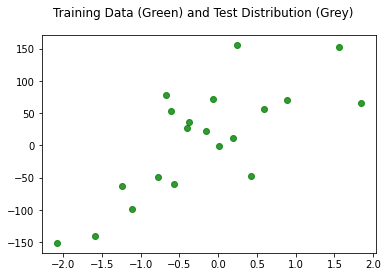

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.99, random_state=0)
fig = plt.figure()
plt.scatter(X_train[:, 0], y_train, alpha=0.8, color='green')
plt.suptitle('Training Data (Green) and Test Distribution (Grey)')

In [ ]:
# Fit a linear regression model
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [ ]:
# Fit a decision tree (sneak preview)
treg = DecisionTreeRegressor(max_depth=5)
treg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
xt = np.arange(-5, 5.0, 0.01)[:, np.newaxis]
xt = np.append(xt, np.ones(xt.shape[0]).reshape(-1, 1), axis=1)
y_1 = reg.predict(xt)
y_2 = treg.predict(xt)

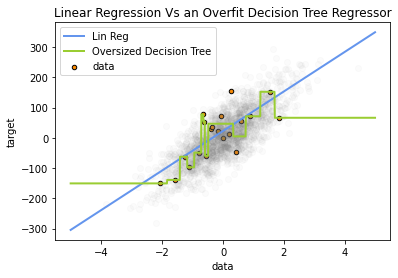

 The linear regression model has a loss of 12.326740226880101 on the total dataset
 The overfit tree has a loss of 7.47747183422007 on the total dataset


In [ ]:
plt.figure()
plt.scatter(X_train[:, 0], y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(xt[:, 0], y_1, color="cornflowerblue",
         label="Lin Reg", linewidth=2)
plt.plot(xt[:, 0], y_2, color="yellowgreen", label="Oversized Decision Tree", linewidth=2)
plt.scatter(X_test[:, 0], y_test, alpha=0.03, color='grey')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Linear Regression Vs an Overfit Decision Tree Regressor")
plt.legend()
plt.show()

# Let's also just check our scores right now
reg.fit(X_train, y_train)
treg.fit(X_train, y_train)
print(f" The linear regression model has a loss of {np.linalg.norm(reg.predict(X_train)- y_train)/len(y_train)} on the total dataset")
print(f" The overfit tree has a loss of {np.linalg.norm(treg.predict(X_train)- y_train)/len(y_train)} on the total dataset")


In [ ]:
# Let's try cross validation!
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


 The linear regression model has a loss of 38.31204938757766 on split 1
 The overfit tree has a loss of 48.32804485728716 on split 1


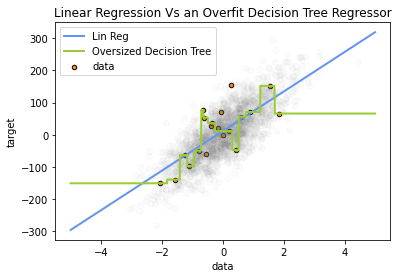

 The linear regression model has a loss of 32.407460949042914 on split 2
 The overfit tree has a loss of 42.27944455909301 on split 2


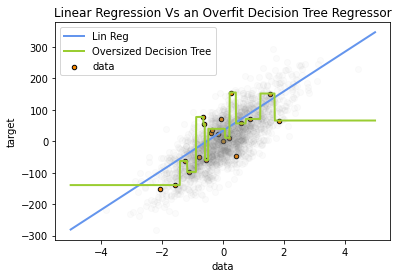

 The linear regression model has a loss of 33.60322279226617 on split 3
 The overfit tree has a loss of 44.11565703514958 on split 3


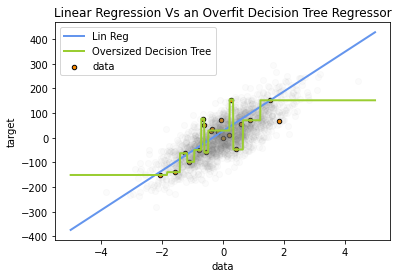

 The linear regression model has a loss of 18.14306765455873 on split 4
 The overfit tree has a loss of 47.384210211683985 on split 4


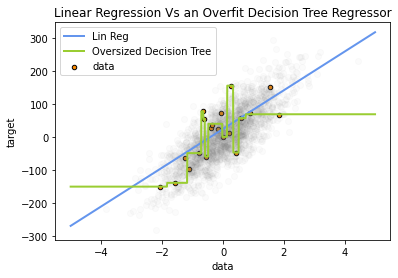

 The linear regression model has a loss of 30.923477436933226 on split 5
 The overfit tree has a loss of 20.50472750467892 on split 5


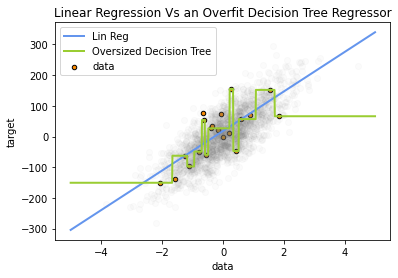

In [ ]:
for idx, (train_index, test_index) in enumerate(kf.split(X_train)):
    x1, x2 = X_train[train_index], X_train[test_index]
    y1, y2 = y_train[train_index], y_train[test_index]
    reg.fit(x1, y1)
    print(f" The linear regression model has a loss of {np.linalg.norm(reg.predict(x2)- y2)/len(y2)} on split {idx+1}")
    treg.fit(x1,y1)
    print(f" The overfit tree has a loss of {np.linalg.norm(treg.predict(x2)- y2)/len(y2)} on split {idx+1}")
    
    # Ignore boilerplate copied from above
    y_1 = reg.predict(xt)
    y_2 = treg.predict(xt)
    plt.scatter(X_train[:, 0], y_train, s=20, edgecolor="black",
              c="darkorange", label="data")
    plt.plot(xt[:, 0], y_1, color="cornflowerblue",
            label="Lin Reg", linewidth=2)
    plt.plot(xt[:, 0], y_2, color="yellowgreen", label="Oversized Decision Tree", linewidth=2)
    plt.scatter(X_test[:, 0], y_test, alpha=0.03, color='grey')
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Linear Regression Vs an Overfit Decision Tree Regressor")
    plt.legend()
    plt.show()

# LOOCV for linear regression

LOOCV is really useful for trading bias (from underestimating the dataset size) for variance (the estimate is less likely to be precicesly accurate) and computational time. For linear regression, we don't actually have to fit the model n times, however! 






In [ ]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/LOOCV.gif/600px-LOOCV.gif")


In [ ]:
reg.fit(X_train, y_train)
print(f'Here, X has shape {X.shape}, so LOOCV would require us to fit a general model {X.shape[0]} times')

Here, X has shape (2000, 2), so LOOCV would require us to fit a general model 2000 times


$
\boldsymbol{H}=\boldsymbol{X}\left(\boldsymbol{X}^{\prime} \boldsymbol{X}\right)^{-1} \boldsymbol{X}^{\prime}
$

In [ ]:
print(f'Except, we know that each point can only affect the fitted model proportional to its residual')
print("Let's use the 'hat matrix' and a useful known result")
H = X_train@np.linalg.inv(X_train.T @ X_train)@X_train.T

Except, we know that each point can only affect the fitted model proportional to its residual
Let's use the 'hat matrix' and a useful known result


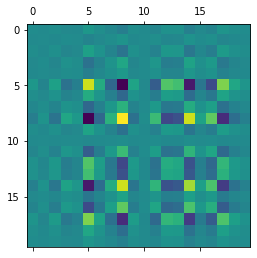

In [ ]:
plt.matshow(H)

In [ ]:
e = np.abs(y_train - reg.predict(X_train)) # Prediction Residual Sum of Squares statistic.

In [ ]:
reg.predict(X_train)

array([  -3.82542659,   18.21322427,  -15.06551558,   38.64466727,
         23.20244916, -113.65017612,  -28.09078799,   50.36598981,
        143.08498189,  -17.7211318 ,   12.30460388,   61.26433058,
        -58.7341586 ,  -50.29312374,  124.02740365,   34.56371124,
         80.55655803,  -81.16247304,  -21.14946665,   -2.00671856])

In [ ]:
assert(np.mean(H@y_train - reg.predict(X_train)) <= 1e-05)

In [ ]:
 reg.predict(X_train)

array([  -3.82542659,   18.21322427,  -15.06551558,   38.64466727,
         23.20244916, -113.65017612,  -28.09078799,   50.36598981,
        143.08498189,  -17.7211318 ,   12.30460388,   61.26433058,
        -58.7341586 ,  -50.29312374,  124.02740365,   34.56371124,
         80.55655803,  -81.16247304,  -21.14946665,   -2.00671856])

In [ ]:
CV_statistic = np.mean([(e[i]/(1-np.diagonal(H)[i]))**2 for i in range(e.shape[0]) ])

# A different kind of generalization: Simple testing for distribution shift

In [ ]:
from folktables import ACSDataSource, ACSEmployment

data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states=["CA"], download=True)
features, label, group = ACSEmployment.df_to_numpy(acs_data)

In [ ]:
from folktables import ACSDataSource, ACSIncome
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
ca_data = data_source.get_data(states=["CA"], download=True)
mi_data = data_source.get_data(states=["MI"], download=True)
ca_features, ca_labels, _ = ACSIncome.df_to_numpy(ca_data)
mi_features, mi_labels, _ = ACSIncome.df_to_numpy(mi_data)

# Plug-in your method for tabular datasets
model = LogisticRegression()

# Train on CA data
model.fit(ca_features, ca_labels)
print(model.score(ca_features, ca_labels))
# Test on MI data
print(model.score(mi_features, mi_labels))


0.7524340071039788
0.7103263477843546


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
def make_random_minibatches(training_set, testing_set, batch_size):
  """Take a training dataset and mixed dataset. Draw one minibatch from each"""
  while True:
    idxs = np.random.choice(range(len(training_set)), size=batch_size)

    test_idxs = np.random.choice(range(len(testing_set)), size=batch_size)

    yield np.cumsum(training_set[idxs, :],axis=1), np.cumsum(testing_set[test_idxs, :], axis=1)

acl = make_random_minibatches(ca_features, mi_features, 20)

In [88]:

train_set = ca_features
for alpha in np.linspace(1, 0, 5):
  ca_size = int(alpha*32768)
  mi_size = 32768-ca_size
  ca_choices = np.random.choice(range(ca_features.shape[0]), size=ca_size)
  mi_choices = np.random.choice(range(mi_features.shape[0]), size=mi_size)
  new_dataset = np.concatenate([ca_features[ca_choices], mi_features[mi_choices]])
  batch_gen = make_random_minibatches(ca_features, new_dataset, 16)
  batches = []
  batch_labels = []
  for i in range(1000):
    iid, shifted = next(batch_gen)
    batches.append(iid.flatten())
    batch_labels.append(0)
    batches.append(shifted.flatten())
    batch_labels.append(1)
    
  clf = LogisticRegression(class_weight='balanced', max_iter=30000)
  clf.fit(batches, batch_labels)

  batches = []
  batch_labels = []
  for i in range(250): # Test set
    iid, shifted = next(batch_gen)
    batches.append(iid.flatten())
    batch_labels.append(0)
    batches.append(shifted.flatten())
    batch_labels.append(1)

  print(f"For {alpha*100}% from training pool")
  print(matthews_corrcoef(clf.predict(batches), batch_labels), "[Closer to 0 indicates no shift]")

For 100.0% from training pool
0.004007219498504305 [Closer to 0 indicates no shift]
For 75.0% from training pool
0.26016864393962436 [Closer to 0 indicates no shift]
For 50.0% from training pool
0.5368424299137753 [Closer to 0 indicates no shift]
For 25.0% from training pool
0.7242839749882065 [Closer to 0 indicates no shift]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


For 0.0% from training pool
0.8848569565017824 [Closer to 0 indicates no shift]
